# Network Security with machine learning

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('NSL-KDD/KDDTest+.txt', delimiter=',')

In [4]:
df.sample(5)

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
2815,0,tcp,http,SF,275,1836,0,0,0,0,...,1.0,0.00,0.02,0.04,0.0,0.0,0.0,0.0,normal,21
21773,0,tcp,http,SF,321,655,0,0,0,0,...,1.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,normal,21
5222,0,tcp,other,REJ,0,0,0,0,0,0,...,0.0,0.01,0.00,0.00,0.0,0.0,0.0,1.0,satan,19
16090,0,tcp,http,SF,325,188,0,0,0,0,...,1.0,0.00,0.05,0.04,0.0,0.0,0.0,0.0,normal,21
732,0,tcp,http,SF,141,4039,0,0,0,0,...,1.0,0.00,0.05,0.05,0.0,0.0,0.0,0.0,normal,21


**-> we are using a dataset called 'NSL-KDD', it is a widely used benchmark dataset for evaluating intrusion detection systems, particularly in the domain of network security.**

In [5]:
df.shape

(22543, 43)

## Pre-Processing & Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22543 entries, 0 to 22542
Data columns (total 43 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        22543 non-null  int64  
 1   tcp      22543 non-null  object 
 2   private  22543 non-null  object 
 3   REJ      22543 non-null  object 
 4   0.1      22543 non-null  int64  
 5   0.2      22543 non-null  int64  
 6   0.3      22543 non-null  int64  
 7   0.4      22543 non-null  int64  
 8   0.5      22543 non-null  int64  
 9   0.6      22543 non-null  int64  
 10  0.7      22543 non-null  int64  
 11  0.8      22543 non-null  int64  
 12  0.9      22543 non-null  int64  
 13  0.10     22543 non-null  int64  
 14  0.11     22543 non-null  int64  
 15  0.12     22543 non-null  int64  
 16  0.13     22543 non-null  int64  
 17  0.14     22543 non-null  int64  
 18  0.15     22543 non-null  int64  
 19  0.16     22543 non-null  int64  
 20  0.17     22543 non-null  int64  
 21  0.18     225

In [7]:
column_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 
                'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 
                'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 
                'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'unknown_feature',
                'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 
                'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 
                'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 
                'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 
                'dst_host_rerror_rate', 'neptune', 'target']

In [8]:
df.columns = column_names

In [9]:
df.sample(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,neptune,target
20458,0,tcp,private,S0,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,1.0,1.0,0.00,0.00,neptune,21
10877,6,tcp,smtp,SF,4034,332,0,0,0,0,...,0.80,0.02,0.01,0.01,0.0,0.0,0.00,0.00,normal,21
3970,0,udp,private,SF,54,56,0,0,0,0,...,1.00,0.00,0.94,0.00,0.0,0.0,0.00,0.00,normal,17
8360,0,tcp,telnet,SF,126,188,0,0,0,0,...,0.89,0.02,0.00,0.00,0.0,0.0,0.02,0.03,guess_passwd,15
8461,4,tcp,pop_3,SF,28,93,0,0,0,0,...,1.00,0.00,0.12,0.27,0.0,0.0,0.00,0.00,guess_passwd,6


*In the NSL-KDD dataset, the target column contains discrete numerical values that correspond to different types of network attacks or classes. Here's a breakdown of some common labels found in the target column based on the provided information:*

**21:** This label often represents the "normal" or benign network traffic, indicating that the network activity is considered normal and not malicious.

**15:** This label could represent a specific type of network attack or intrusion, such as a denial-of-service (DoS) attack.

**11:** This label could represent another type of network attack or intrusion, possibly related to unauthorized access or probing.

## Let's scale our data using MinMaxScalar

In [10]:
categorical_cols = ['protocol_type', 'service', 'flag', 'neptune']
df2 = pd.get_dummies(df, columns=categorical_cols)

In [11]:
numeric_cols = ['duration', 'src_bytes', 'dst_bytes', 'count', 'srv_count', 'serror_rate', 
                 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 
                 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 
                 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 
                 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate']

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()
df2[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [14]:
# Assume 21 represents normal (benign) traffic, and other values (e.g., 15, 11) represent different attacks

df2['target'] = df['target'].apply(lambda x: 1 if x != 21 else 0)
# 1 for attacks, 0 for normal

In [15]:
df.head

<bound method NDFrame.head of        duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0             0           tcp   private   REJ          0          0     0   
1             2           tcp  ftp_data    SF      12983          0     0   
2             0          icmp     eco_i    SF         20          0     0   
3             1           tcp    telnet  RSTO          0         15     0   
4             0           tcp      http    SF        267      14515     0   
...         ...           ...       ...   ...        ...        ...   ...   
22538         0           tcp      smtp    SF        794        333     0   
22539         0           tcp      http    SF        317        938     0   
22540         0           tcp      http    SF      54540       8314     0   
22541         0           udp  domain_u    SF         42         42     0   
22542         0           tcp    sunrpc   REJ          0          0     0   

       wrong_fragment  urgent  hot  ...  dst_

In [18]:
df2.head

<bound method NDFrame.head of        duration     src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0      0.000000  0.000000e+00   0.000000     0               0       0    0   
1      0.000035  2.066513e-04   0.000000     0               0       0    0   
2      0.000000  3.183413e-07   0.000000     0               0       0    0   
3      0.000017  0.000000e+00   0.000011     0               0       0    0   
4      0.000000  4.249857e-06   0.010784     0               0       0    0   
...         ...           ...        ...   ...             ...     ...  ...   
22538  0.000000  1.263815e-05   0.000247     0               0       0    0   
22539  0.000000  5.045710e-06   0.000697     0               0       0    0   
22540  0.000000  8.681168e-04   0.006177     0               0       0    2   
22541  0.000000  6.685168e-07   0.000031     0               0       0    0   
22542  0.000000  0.000000e+00   0.000000     0               0       0    0   

       num_failed_log

**-> we have no missing or duplicate values in out dataset so we dont't have to process those aspects of the data**

## Exploratory Data Analysis

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df2.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,target
count,22543.000000,2.254300e+04,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,...,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000
mean,0.003792,1.654724e-04,0.001528,0.000311,0.008428,0.000710,0.105399,0.021648,0.442222,0.119904,...,0.551986,0.608747,0.090541,0.132267,0.019639,0.097818,0.099430,0.233351,0.226649,0.525662
std,0.024382,7.525540e-03,0.015766,0.017619,0.142602,0.036474,0.928448,0.150331,0.496661,7.269758,...,0.438365,0.435681,0.220722,0.306274,0.085396,0.273144,0.281872,0.387204,0.400851,0.499352
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.058824,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,8.595216e-07,0.000034,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.658824,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,4.568198e-06,0.000447,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,1.000000
max,1.000000,1.000000e+00,1.000000,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
df2['target'].value_counts()

target
1    11850
0    10693
Name: count, dtype: int64

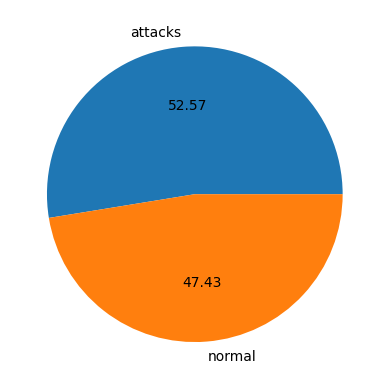

In [23]:
plt.pie(df2['target'].value_counts(), labels=['attacks','normal'],autopct="%0.2f")
plt.show()

**-> NSL-KDD is a data set suggested to solve some of the inherent problems of the KDD'99 data set like imabalanced data. KDD is more balanced maintaining a 52.57% of 'attack' or '1' data.**

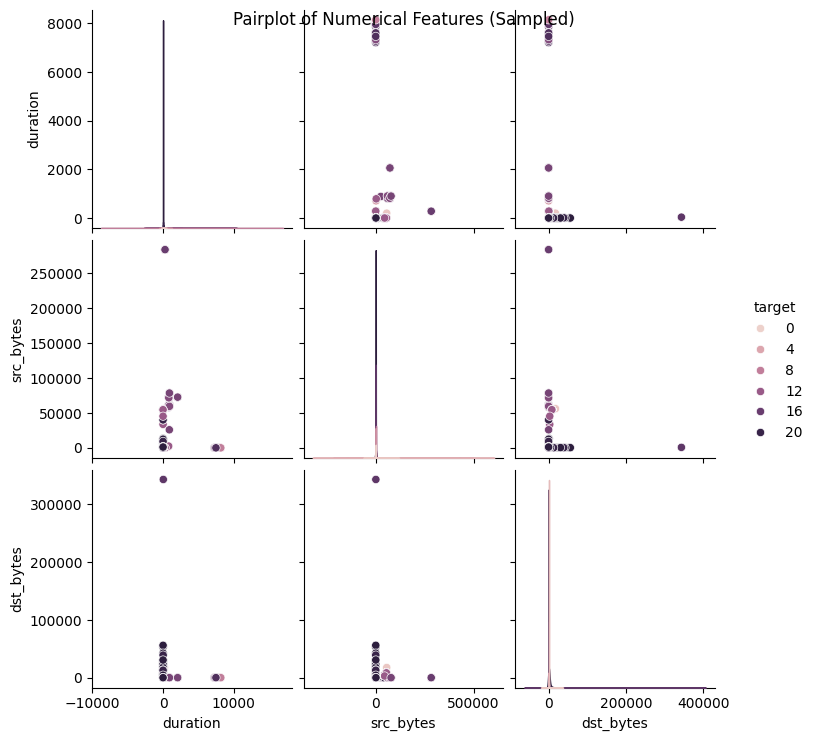

In [24]:
sns.pairplot(df.sample(1000), vars=numeric_cols[:3], hue='target')
plt.suptitle('Pairplot of Numerical Features (Sampled)')
plt.show()

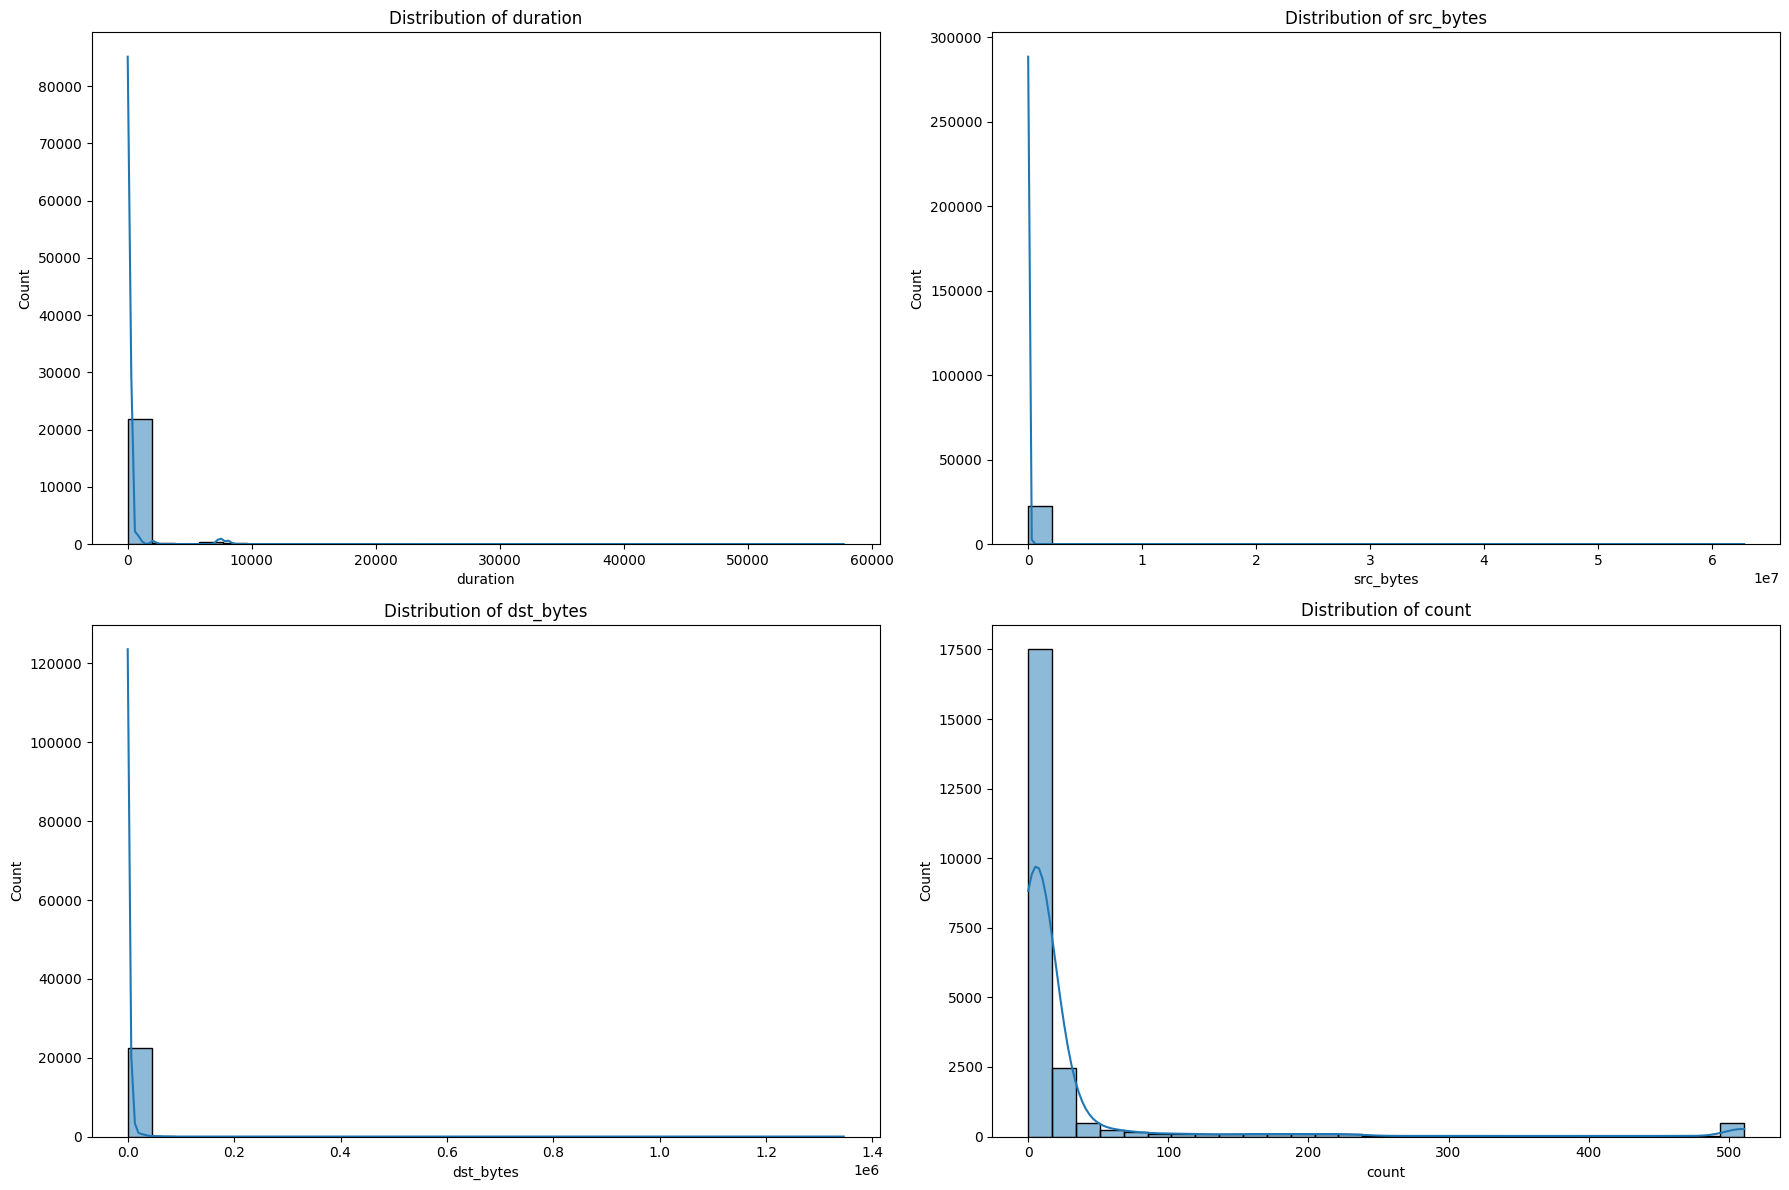

In [25]:
# Distribution of numerical features

plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols[:4]):  # Displaying the first 4 numerical features
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

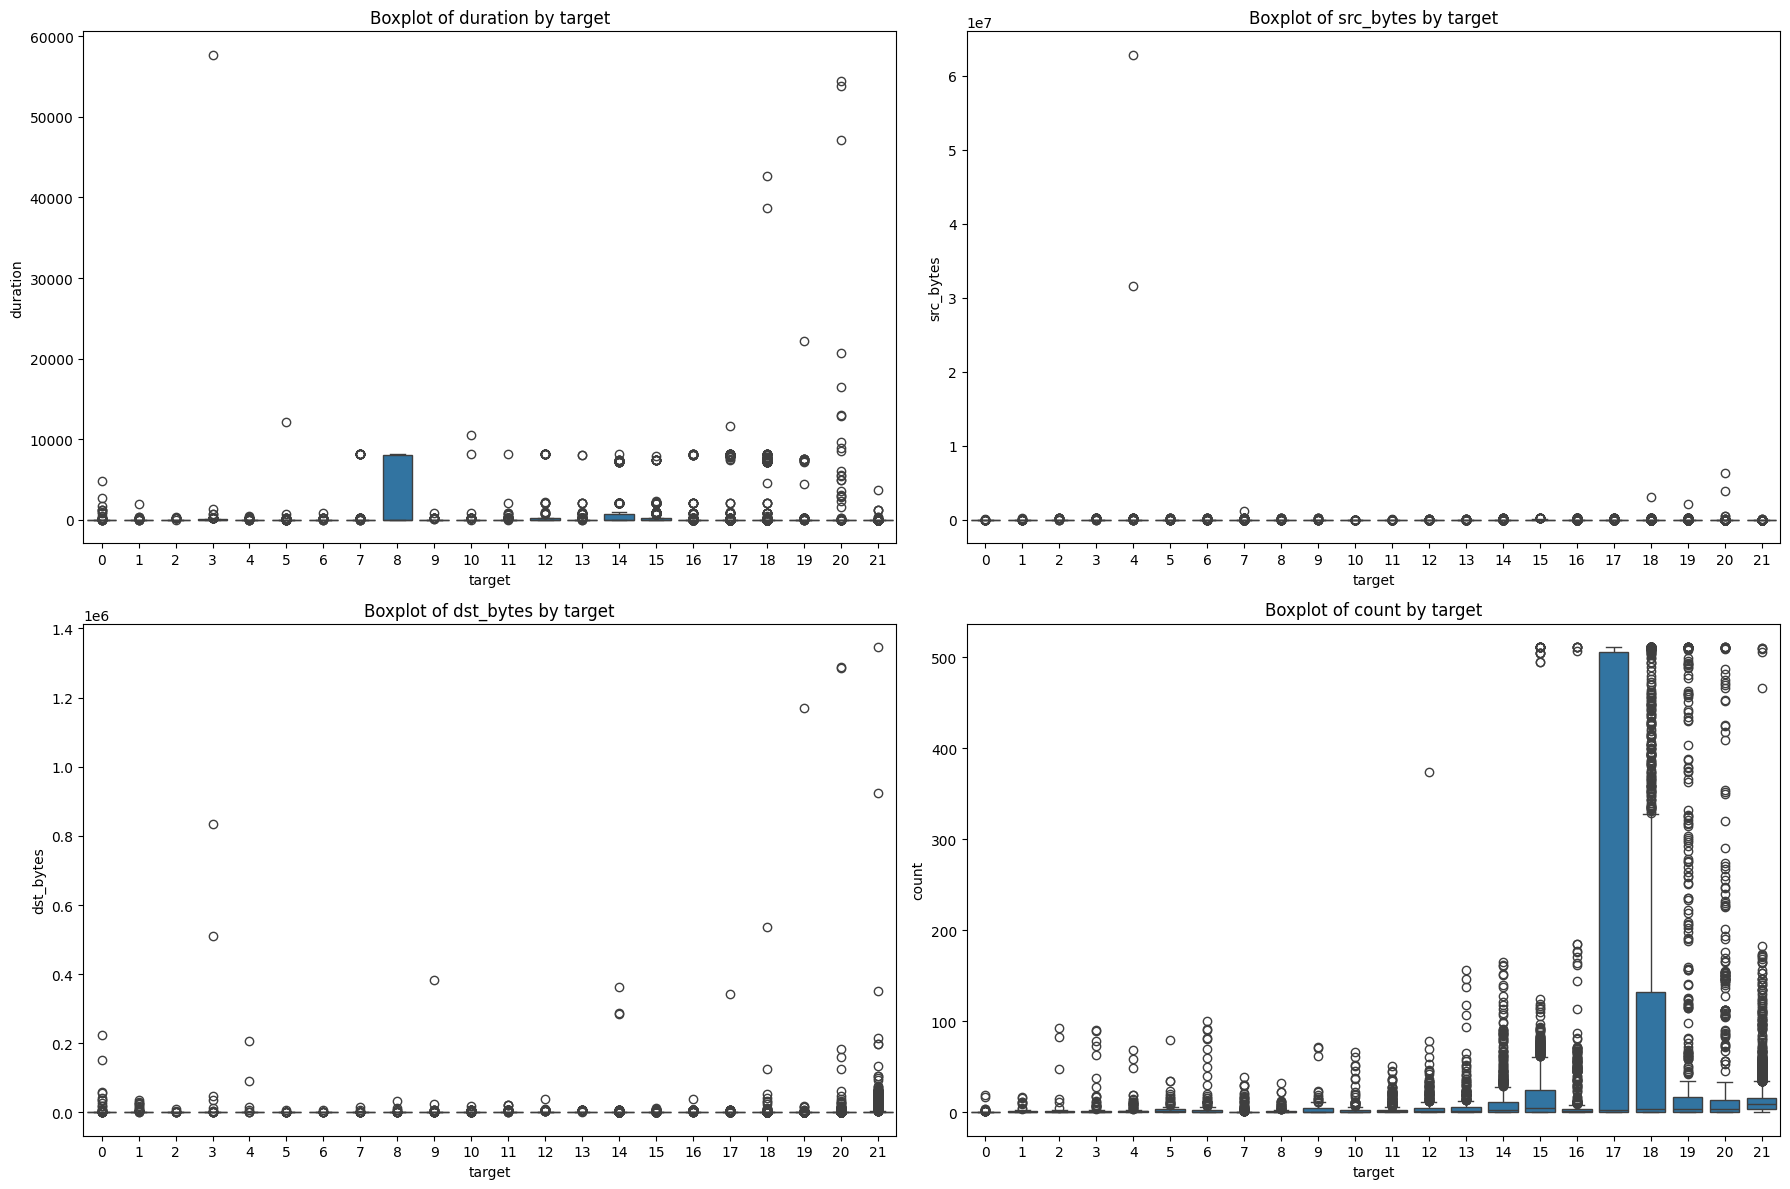

In [26]:
# Boxplots for numerical features by target

plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols[:4]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'Boxplot of {col} by target')
plt.tight_layout()
plt.show()

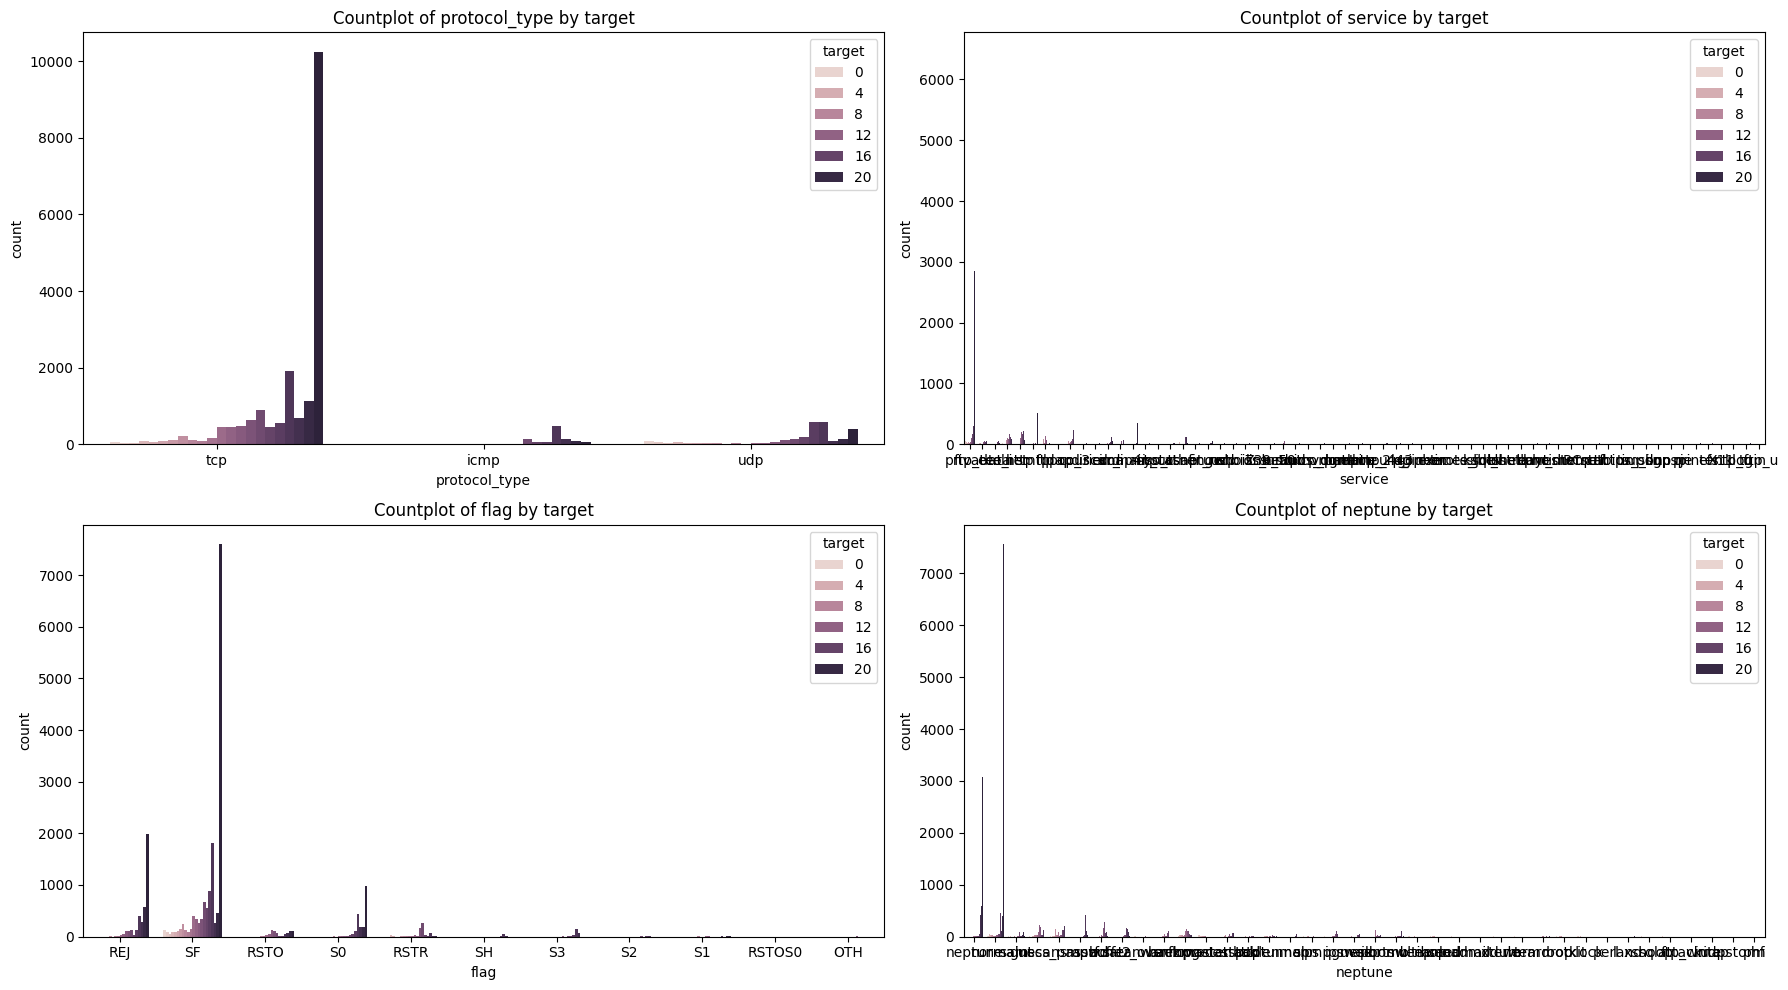

In [27]:
# Count plot of categorical features

plt.figure(figsize=(18, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 2, i+1)  # Use 2 rows and 2 subplots in each row
    sns.countplot(x=col, data=df, hue='target')
    plt.title(f'Countplot of {col} by target')
plt.tight_layout()
plt.show()

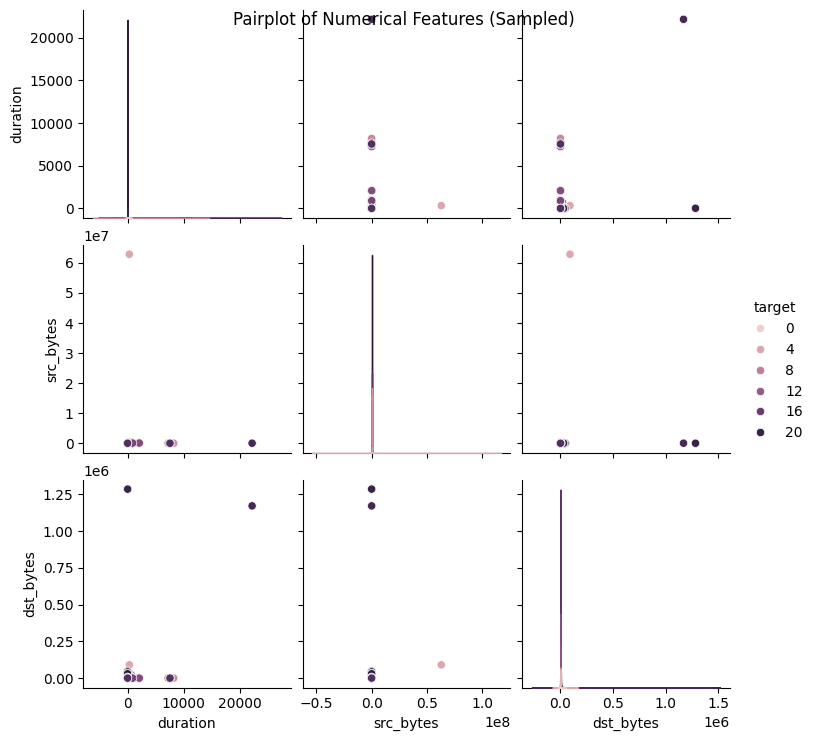

In [28]:
# Pairplot of a few numerical features

sns.pairplot(df.sample(1000), vars=numeric_cols[:3], hue='target')
plt.suptitle('Pairplot of Numerical Features (Sampled)')
plt.show()

---

## Feature Engineering

In [29]:
# Create binary features for each protocol type

df2['is_protocol_tcp'] = (df2['protocol_type_tcp'] == 1).astype(int)
df2['is_protocol_udp'] = (df2['protocol_type_udp'] == 1).astype(int)
df2['is_protocol_icmp'] = (df2['protocol_type_icmp'] == 1).astype(int)

In [30]:
# Create binary features for each flag

df2['is_flag_SF'] = (df2['flag_SF'] == 1).astype(int)
df2['is_flag_S0'] = (df2['flag_S0'] == 1).astype(int)
df2['is_flag_REJ'] = (df2['flag_REJ'] == 1).astype(int)

In [31]:
# Aggregate services into categories

web_services = ['http', 'https', 'smtp', 'ftp', 'ssh', 'ssl']
df2['service_category'] = df['service'].apply(lambda x: 'Web' if x in web_services else 'Others')

In [32]:
df2.head

<bound method NDFrame.head of        duration     src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0      0.000000  0.000000e+00   0.000000     0               0       0    0   
1      0.000035  2.066513e-04   0.000000     0               0       0    0   
2      0.000000  3.183413e-07   0.000000     0               0       0    0   
3      0.000017  0.000000e+00   0.000011     0               0       0    0   
4      0.000000  4.249857e-06   0.010784     0               0       0    0   
...         ...           ...        ...   ...             ...     ...  ...   
22538  0.000000  1.263815e-05   0.000247     0               0       0    0   
22539  0.000000  5.045710e-06   0.000697     0               0       0    0   
22540  0.000000  8.681168e-04   0.006177     0               0       0    2   
22541  0.000000  6.685168e-07   0.000031     0               0       0    0   
22542  0.000000  0.000000e+00   0.000000     0               0       0    0   

       num_failed_log

### We currently have a lot of features, so lets select the top 10 features using 'RFE'

In [33]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

In [34]:
random_model = RandomForestClassifier(random_state=42)

In [85]:
n_features_to_select = 10  # Adjust this based on your preference
rfe = RFE(estimator=rf_model, n_features_to_select=n_features_to_select)
fit = rfe.fit(X_train_encoded, y_train)

In [86]:
selected_features = [X_train_encoded.columns[i] for i in range(len(rfe.support_)) if rfe.support_[i]]
print("Selected Features:", selected_features)

Selected Features: ['dst_bytes', 'unknown_feature', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_srv_serror_rate', 'service_http', 'service_private', 'neptune_neptune', 'neptune_normal']


In [35]:
df2[['dst_bytes', 'unknown_feature', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_srv_serror_rate', 'service_http', 'service_private', 'neptune_neptune', 'neptune_normal','target']]

,dst_bytes,unknown_feature,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_srv_serror_rate,service_http,service_private,neptune_neptune,neptune_normal,target
0,0.000000,136,0.003922,0.00,0.06,1.00,False,True,True,False,0
1,0.000000,1,0.337255,0.61,0.04,0.00,False,False,False,True,0
2,0.000000,1,0.223529,1.00,0.00,0.00,False,False,False,False,1
3,0.000011,1,0.337255,0.31,0.17,0.83,False,False,False,False,1
4,0.010784,4,1.000000,1.00,0.00,0.00,True,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...
22538,0.000247,1,0.552941,0.72,0.06,0.00,False,False,False,True,0
22539,0.000697,2,1.000000,1.00,0.00,0.00,True,False,False,True,0
22540,0.006177,5,1.000000,1.00,0.00,0.07,True,False,False,False,1
22541,0.000031,4,0.988235,0.99,0.01,0.00,False,False,False,True,0


### We'll later use these features to train the best performing model

## Model Building

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier

In [79]:
X = df2.drop('target', axis=1)  # Features
y = df2['target']  # Target variable

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Perform one-hot encoding on categorical features

X_train_encoded = pd.get_dummies(X_train, columns=['service_category'])
X_test_encoded = pd.get_dummies(X_test, columns=['service_category'])

**Random Forest:**

In [83]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_encoded, y_train)

RandomForestClassifier(random_state=42)

**Support Vector Machine:**

In [84]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train_encoded, y_train)

SVC(random_state=42)

**Logistic Regression:**

In [87]:
log_reg_model = LogisticRegression(random_state=42, max_iter=10000)  # Increase max_iter
log_reg_model.fit(X_train_encoded, y_train)

LogisticRegression(max_iter=10000, random_state=42)

**Neural Network (Multi-layer Perceptron):**

In [88]:
nn_model = MLPClassifier(random_state=42)
nn_model.fit(X_train_encoded, y_train)

MLPClassifier(random_state=42)

In [89]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

In [90]:
rf_predictions = rf_model.predict(X_test_encoded)
svm_predictions = svm_model.predict(X_test_encoded)
log_reg_predictions = log_reg_model.predict(X_test_encoded)
nn_predictions = nn_model.predict(X_test_encoded)

In [91]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
log_reg_accuracy = accuracy_score(y_test, log_reg_predictions)
nn_accuracy = accuracy_score(y_test, nn_predictions)

In [92]:
print("Accuracy Scores:")
print("Random Forest:", rf_accuracy)
print("SVM:", svm_accuracy)
print("Logistic Regression:", log_reg_accuracy)
print("Neural Network:", nn_accuracy)
print("\n")

Accuracy Scores:
Random Forest: 0.9831448214681747
SVM: 0.8148148148148148
Logistic Regression: 0.9636282989576402
Neural Network: 0.9733865602129075




In [93]:
models = ['Random Forest', 'SVM', 'Logistic Regression', 'Neural Network']
predictions = [rf_predictions, svm_predictions, log_reg_predictions, nn_predictions]

In [94]:
for model_name, preds in zip(models, predictions):
    precision = precision_score(y_test, preds, average='weighted')
    recall = recall_score(y_test, preds, average='weighted')
    confusion_mat = confusion_matrix(y_test, preds)
    fp = confusion_mat[0, 1] / (confusion_mat[0, 0] + confusion_mat[0, 1])  # False Positive Rate
    roc_auc = roc_auc_score(y_test, preds)
    
    print(f"Metrics for {model_name}:")
    print("Precision:", precision)
    print("Recall:", recall)
    print("False Positive Rate:", fp)
    print("Area under ROC curve:", roc_auc)
    print("Confusion Matrix:")
    print(confusion_mat)
    print("\n")

Metrics for Random Forest:
Precision: 0.9831959203923114
Recall: 0.9831448214681747
False Positive Rate: 0.02430886558627264
Area under ROC curve: 0.982660996489319
Confusion Matrix:
[[2047   51]
 [  25 2386]]


Metrics for SVM:
Precision: 0.8167135584564832
Recall: 0.8148148148148148
False Positive Rate: 0.16682554814108674
Area under ROC curve: 0.8160065540090916
Confusion Matrix:
[[1748  350]
 [ 485 1926]]


Metrics for Logistic Regression:
Precision: 0.9636248454071212
Recall: 0.9636282989576402
False Positive Rate: 0.04051477597712107
Area under ROC curve: 0.9633593685439985
Confusion Matrix:
[[2013   85]
 [  79 2332]]


Metrics for Neural Network:
Precision: 0.9734284892628444
Recall: 0.9733865602129075
False Positive Rate: 0.03479504289799809
Area under ROC curve: 0.9728554856020172
Confusion Matrix:
[[2025   73]
 [  47 2364]]




In [95]:
X_train_selected = X_train_encoded[selected_features]
X_test_selected = X_test_encoded[selected_features]

In [96]:
rf_model_selected = RandomForestClassifier(random_state=42)
rf_model_selected.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

In [97]:
rf_predictions_selected = rf_model_selected.predict(X_test_selected)

In [98]:
rf_accuracy_selected = accuracy_score(y_test, rf_predictions_selected)
print("Accuracy Score with Selected Features:", rf_accuracy_selected)

Accuracy Score with Selected Features: 0.9691727655799512


In [99]:
print("Classification Report:")
print(classification_report(y_test, rf_predictions_selected), "\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions_selected))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2098
           1       0.97      0.97      0.97      2411

    accuracy                           0.97      4509
   macro avg       0.97      0.97      0.97      4509
weighted avg       0.97      0.97      0.97      4509
 

Confusion Matrix:
[[2029   69]
 [  70 2341]]


## Fine Tuning

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30]
}

In [102]:
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

In [103]:
log_reg_params = {
    'C': [0.1, 1, 10],
    'max_iter': [5000, 7000, 10000, 12500, 15000]
}

In [104]:
nn_params = {
    'hidden_layer_sizes': [(64, 64), (128, 128)],
    'activation': ['relu', 'tanh'],
    'max_iter': [5000, 7000, 10000, 12500, 15000]
}

In [105]:
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=rf_params, cv=3)
svm_grid = GridSearchCV(SVC(random_state=42), param_grid=svm_params, cv=3)
log_reg_grid = GridSearchCV(LogisticRegression(random_state=42), param_grid=log_reg_params, cv=3)
nn_grid = GridSearchCV(MLPClassifier(random_state=42), param_grid=nn_params, cv=3)

In [106]:
rf_grid.fit(X_train_encoded, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 150]})

In [107]:
svm_grid.fit(X_train_encoded, y_train)

GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [109]:
log_reg_grid.fit(X_train_encoded, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.1, 1, 10],
                         'max_iter': [5000, 7000, 10000, 12500, 15000]})

In [110]:
nn_grid.fit(X_train_encoded, y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(64, 64), (128, 128)],
                         'max_iter': [5000, 7000, 10000, 12500, 15000]})

### Let's make a Voting Classifier for the four models

In [112]:
from sklearn.ensemble import VotingClassifier

In [113]:
models = [('Random Forest', rf_model), ('SVM', svm_model), ('Logistic Regression', log_reg_model), ('Neural Network', nn_model)]

In [114]:
voting_clf = VotingClassifier(estimators=models, voting='hard')

In [115]:
voting_clf.fit(X_train_encoded, y_train)

VotingClassifier(estimators=[('Random Forest',
                              RandomForestClassifier(random_state=42)),
                             ('SVM', SVC(random_state=42)),
                             ('Logistic Regression',
                              LogisticRegression(max_iter=10000,
                                                 random_state=42)),
                             ('Neural Network',
                              MLPClassifier(random_state=42))])

In [116]:
ensemble_predictions = voting_clf.predict(X_test_encoded)

In [117]:
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)

In [118]:
print("Ensemble (Voting Classifier) Accuracy:", ensemble_accuracy)
print("Classification Report for Ensemble:")
print(classification_report(y_test, ensemble_predictions))
print("Confusion Matrix for Ensemble:")
print(confusion_matrix(y_test, ensemble_predictions))

Ensemble (Voting Classifier) Accuracy: 0.9713905522288756
Classification Report for Ensemble:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2098
           1       0.97      0.97      0.97      2411

    accuracy                           0.97      4509
   macro avg       0.97      0.97      0.97      4509
weighted avg       0.97      0.97      0.97      4509

Confusion Matrix for Ensemble:
[[2036   62]
 [  67 2344]]


- **Accuracy:** The accuracy of the model is approximately 97.12%.
- **Precision:** Precision is a measure of the accuracy of the classifier in predicting the positive class. For both classes (0 and 1), the precision is around 97%.
- **Sensivity:** Recall measures the proportion of actual positive instances that were correctly predicted by the model. It's also around 97% for both classes.
- **The F1-score** is the weighted average of precision and recall. It's a good way to show that a classifer has a good value for both recall and precision. It's also around 97% for both classes.

---

## Predictive Model

In [119]:
from sklearn.preprocessing import LabelEncoder

In [120]:
print("Sample predictions using Random Forest:")
print(rf_predictions[:10])

Sample predictions using Random Forest:
[1 1 1 0 1 1 1 1 0 1]


In [121]:
predicted_probabilities_rf = rf_model.predict_proba(X_test_encoded)
print("Sample predicted probabilities using Random Forest:")
print(predicted_probabilities_rf[:10])

Sample predicted probabilities using Random Forest:
[[0.00000000e+00 1.00000000e+00]
 [1.50000000e-01 8.50000000e-01]
 [0.00000000e+00 1.00000000e+00]
 [9.99950134e-01 4.98655517e-05]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00]
 [1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00]]


---

## Model Serialization

In [122]:
import pickle

In [123]:
model_filename = 'random_forest_model.pkl'

In [124]:
with open(model_filename, 'wb') as file:
    pickle.dump(rf_model, file)

In [125]:
print(f"Random Forest model saved to {model_filename}")

Random Forest model saved to random_forest_model.pkl


In [126]:
pickle.dump(scaler, open('normalization.pkl','wb'))

In [127]:
pickle.dump(rf_model_selected, open('selected_randomforest.pkl','wb'))